In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:

# Load the CSV file
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AusApparalSales4thQrt2020.csv')

In [23]:
df.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [31]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [17]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [43]:
print("Region_wise_Sale")
Region_wise_Sale=df.groupby("State")["Sales"].sum().sort_values(ascending=False)
print(Region_wise_Sale)

Region_wise_Sale
State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64


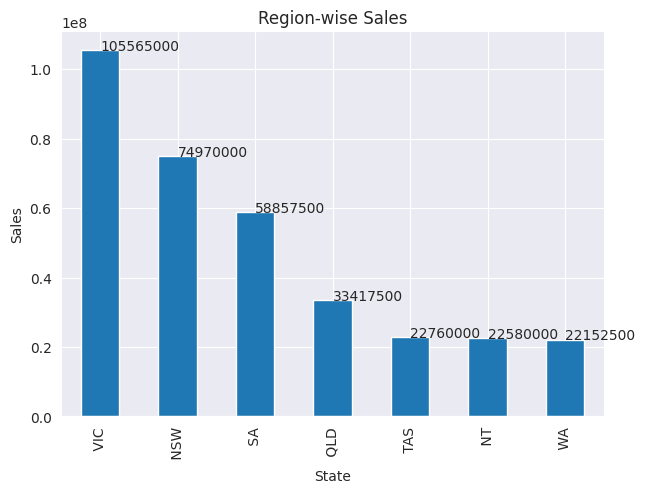

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

ax = Region_wise_Sale.plot(kind='bar', figsize=(7,5))
ax.set_xlabel("State")
ax.set_ylabel("Sales")
ax.set_title("Region-wise Sales")
for i,j in enumerate(Region_wise_Sale):
  plt.text(i,j,j)
plt.show()

In [70]:
lowest_Sale=Region_wise_Sale.idxmin()
print("Lowest_Sale:",lowest_Sale)
Higest_Sale=Region_wise_Sale.idxmax()
print("Highest_Sale:",Higest_Sale)

Lowest_Sale:  WA
Highest_Sale:  VIC


In [69]:
grouped_data = df.groupby(['Time', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'})
print(grouped_data)

                      Sales   Unit
Time      Group                   
Afternoon Kids     28502500  11401
          Men      28767500  11507
          Seniors  28195000  11278
          Women    28542500  11417
Evening   Kids     28052500  11221
          Men      28222500  11289
          Seniors  27267500  10907
          Women    28545000  11418
Morning   Kids     28517500  11407
          Men      28760000  11504
          Seniors  28575000  11430
          Women    28355000  11342


In [75]:
# b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

Group_Wise_Sale=df.groupby("Group")["Sales"].sum()
Group_Wise_Sale.sort_values(ascending=False)


,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


In [76]:
Higest_Sale=Group_Wise_Sale.idxmax()
Lowest_Sale=Group_Wise_Sale.idxmin()
print("Higest_Sale:",Higest_Sale)
print("Lowest_Sale:",Lowest_Sale)

Higest_Sale:  Men
Lowest_Sale:  Seniors


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [95]:
#Convert Date object to datetime type
df["Date"]= pd.to_datetime(df['Date'])

In [96]:
df["Time"].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [97]:
from re import T
Time_wise_Sale=df.groupby("Time")["Sales"].sum()
Time_wise_Sale.sort_values(ascending=False)

,Sales
Time,
Morning,114207500
Afternoon,114007500
Evening,112087500


In [104]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [122]:
## State-wise Sales Analysis for Different  Groups (Kids, Women, Men, and Seniors).
df.groupby(['State', 'Group']).agg({'Sales': 'sum'}).unstack()

Sales                              
Group      Kids       Men   Seniors     Women
State                                        
NSW    18587500  19022500  18187500  19172500
NT      5700000   5762500   5465000   5652500
QLD     8510000   8392500   8190000   8325000
SA     14515000  14655000  14717500  14970000
TAS     5775000   5757500   5650000   5577500
VIC    26360000  26407500  26315000  26482500
WA      5625000   5752500   5512500   5262500

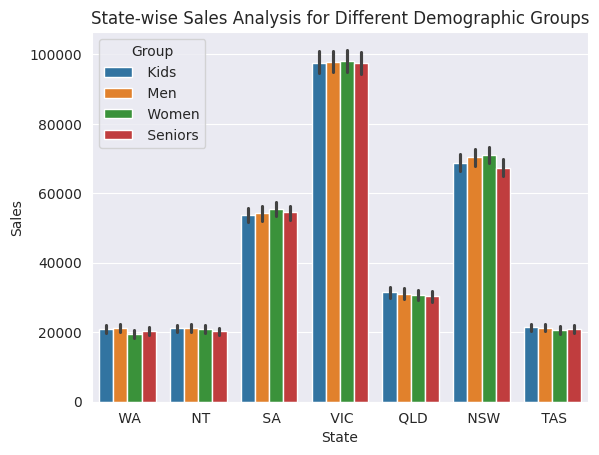

In [123]:
## State-wise Sales Analysis for Different  Groups (Kids, Women, Men, and Seniors )
import seaborn as sns
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.show()


In [126]:
## Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
df.groupby(["Group", "State"]). agg({"Sales":"sum"}).unstack()


Sales                                                        
State         NSW       NT      QLD        SA      TAS       VIC       WA
Group                                                                    
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500

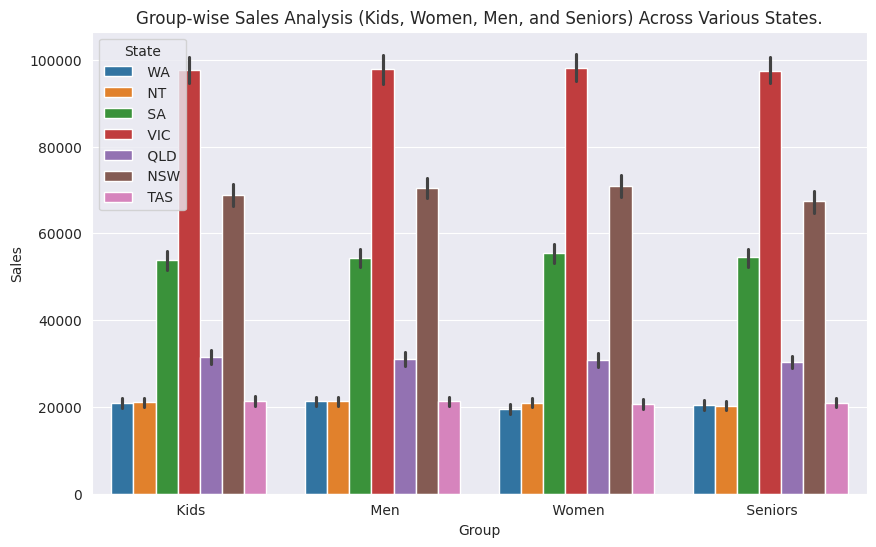

In [118]:
## Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States
plt.figure(figsize=(10,6))
sns.barplot(x="Group" , y= "Sales" ,hue ="State" , data =df)
plt.title("Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.")
plt.show()

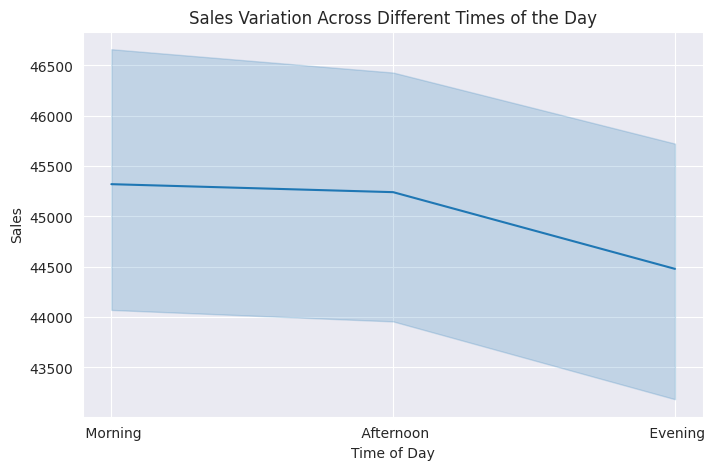

In [127]:
#Identify peak and off-peak sales periods
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Sales Variation Across Different Times of the Day')
plt.ylabel('Sales')
plt.xlabel('Time of Day')
plt.show()

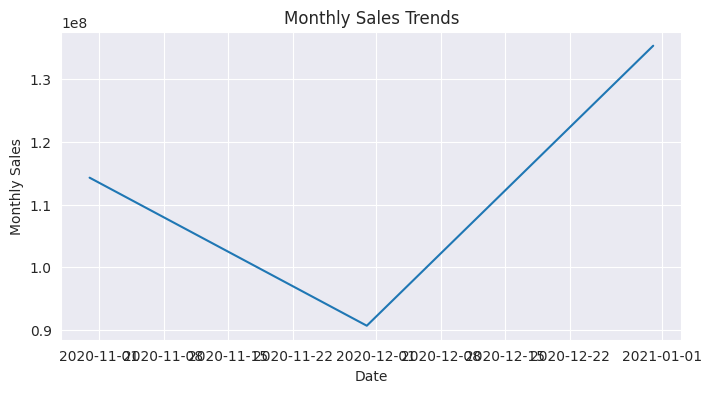

“Sales demonstrate a clear upward trend from September through the New Year period.”


In [135]:
if df.index.name != 'Date':
    df.set_index('Date', inplace=True)
# Monthly sales
monthly_sales = df['Sales'].resample('ME').sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()
print("“Sales demonstrate a clear upward trend from September through the New Year period.”")